In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

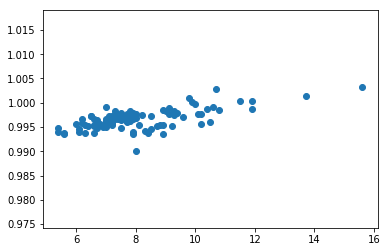

In [3]:
dfx = pd.read_csv("linearX.csv")
dfy = pd.read_csv("linearY.csv")
x = dfx.values
y = dfy.values
plt.scatter(x,y)

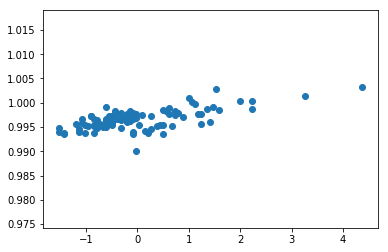

In [4]:
#to normalize i.e mean=0 and std=1
X,Y = (x-x.mean())/x.std(),y
plt.scatter(X,Y)

# gradient descent algo for linear regression

[0.9965452 0.0013579]


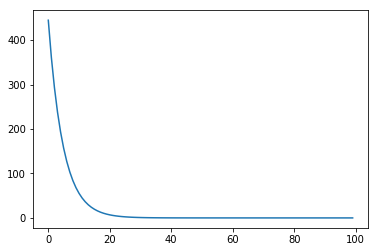

In [19]:
def hypothesis(theta,x):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    tot_error = 0
    m = X.shape[0]
    for i in range(m):
        tot_error+=(hypothesis(theta,X[i])-Y[i])**2
    return 0.5*tot_error

def gradient(Y,X,theta):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    for i in range(m):
        grad[0]+=(hypothesis(theta,X[i])-Y[i])
        grad[1]+=(hypothesis(theta,X[i])-Y[i])*X[i]
    return grad

def batch_gradient(Y,X,theta,batch_size=10):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    for i in indices:
        grad[0]+=(hypothesis(theta,X[i])-Y[i])
        grad[1]+=(hypothesis(theta,X[i])-Y[i])*X[i]
    return grad

def gradientDescent(X,Y,learning_rate,max_itr):
    grad=np.array([0.0,0.0], dtype=np.float64)
    
    #theta=np.array([0.0,0.0], dtype=np.float64)
    theta=np.array([-2.0,0.0], dtype=np.float64)
    #above initial theta is taken -2,0 for better 3d plotting of data few cells below
    #but its perfectly fine to take it as 0
    
    error_list = []
    theta_list = []
    for i in range(max_itr):
        grad = gradient(Y,X,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list,theta_list

theta,error_list,theta_list = gradientDescent(X,Y,learning_rate=0.001,max_itr=100)
print(theta)
plt.plot(error_list)


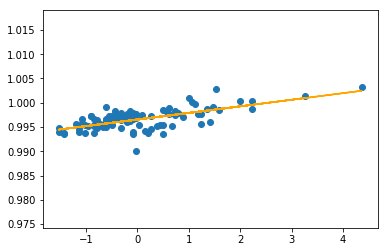

In [20]:

plt.scatter(X,Y)
plt.plot(X,hypothesis(theta,X),color="orange")


In [21]:
#testing the model
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


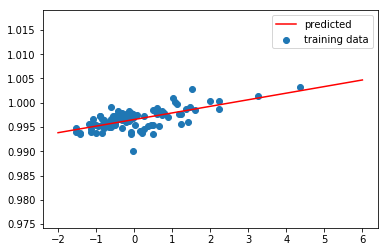

In [22]:
plt.scatter(X,Y,label="training data")
plt.plot(xtest,hypothesis(theta,xtest),color="red",label = "predicted")
plt.legend()
plt.show()

In [23]:
from mpl_toolkits.mplot3d import Axes3D

## plotting 3d visualization of loss for theta of own choice

In [24]:
#plotting 3d loss for different theta values of own choice
t0 = np.arange(-2,3,0.1)
t1 = np.arange(-2,3,0.1)
t0,t1 = np.meshgrid(t0,t1)

J = np.zeros(t0.shape)

m=t0.shape[0]
n=t0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - t1[i,j]*X - t0[i,j])**2)

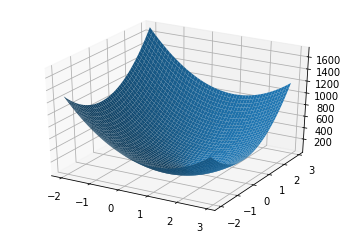

In [25]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(t0,t1,J)
plt.show()

### lets have trajectory for gradient descent

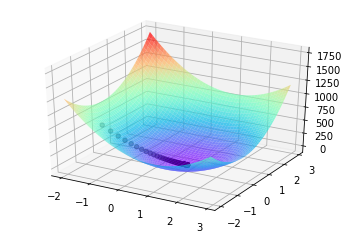

In [26]:
theta_list = np.array(theta_list)
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color="black")
axes.plot_surface(t0,t1,J,cmap="rainbow",alpha=0.7)
plt.show()